In [665]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# **_1) Reading the Dataset_**

In [666]:
data = pd.read_csv(r'P1_Churn_Modelling.csv')

In [667]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [668]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [669]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [670]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- ### **_Removing customer Id, RowNumber, and Surname because they are unique values that don't add important information to out model_**

In [671]:
data.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [672]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# **_2) Data Visualization_**

In [673]:
age_above_or_equal_30 = data['Age'].loc[data['Age'] >= 30].count()
age_below_30 = data['Age'].loc[data['Age'] < 30].count()

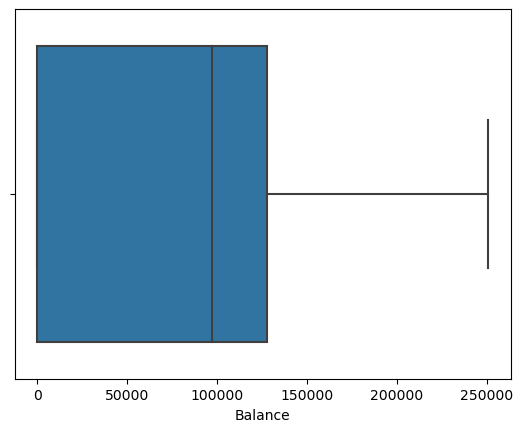

In [674]:
sns.boxplot(x=data['Balance'],hue=data['Gender'])
plt.show()

In [675]:
px.pie(values=[age_above_or_equal_30,age_below_30], labels=['Age > 30', 'Age < 30'],names=['Age > 30', 'Age < 30'])

In [676]:
age_distribution_percent = age_above_or_equal_30/len(data) * 100
age_distribution_percent

83.59

- ### **_Nearly  84% of the data's age are 30 years old or more, thus the majority of the of customers are adults_**

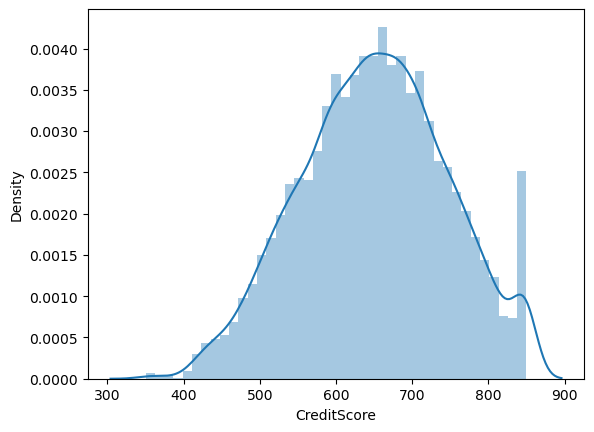

In [677]:
sns.distplot(data['CreditScore'])
plt.show()

- ### **_The distribution of the credit score of custoemrs are distributed in a balance manner_**

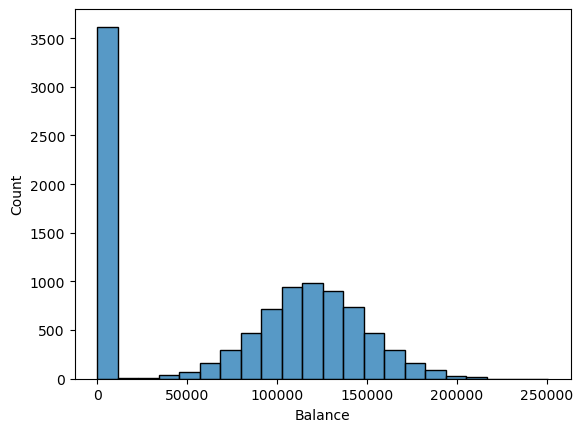

In [678]:
sns.histplot(data['Balance'])
plt.show()

- ### **_The majority of the customers have 0$ in their balance and the rest distributed arround the average balance value_**

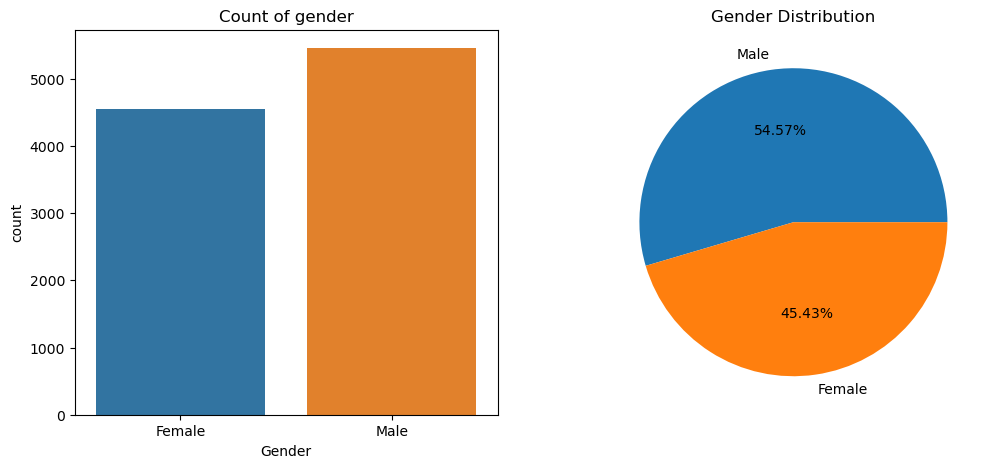

In [679]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,5))

sns.countplot(data=data,x='Gender',ax=axis1)
axis1.set_title('Count of gender')

axis2.pie(x=data['Gender'].value_counts(),labels=['Male','Female'],autopct='%.2f%%')
axis2.set_title('Gender Distribution')
plt.show()

In [680]:
px.pie(data_frame=data,values=data['Geography'].value_counts(),names=data['Geography'].unique())

In [681]:
corr = data.corr()

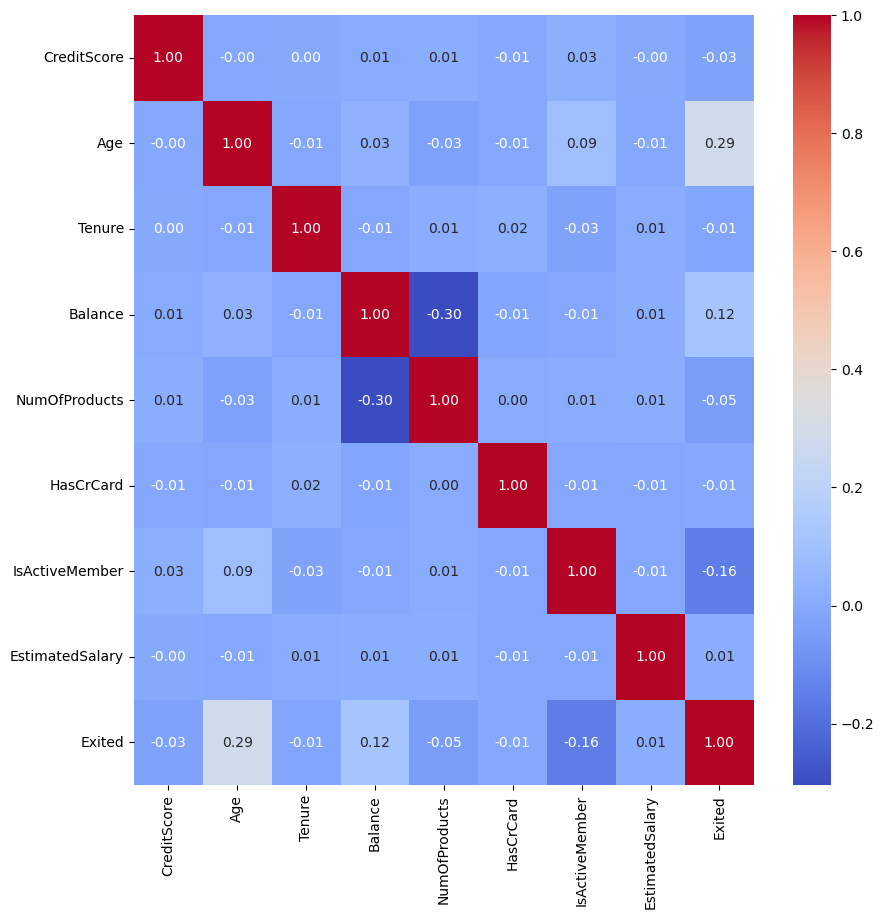

In [682]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,cmap='coolwarm',fmt='.2f',annot=True)
plt.show()

- ### **_The Correllation between most of the data is relatively very weak_**

In [683]:
ratio = data['Exited'].value_counts()[0] / data['Exited'].count()

In [684]:
percentage = ratio*100

In [685]:
percentage

79.63

- ### **_Nearly 80% of the cusotmers exited the service after subscribing_**

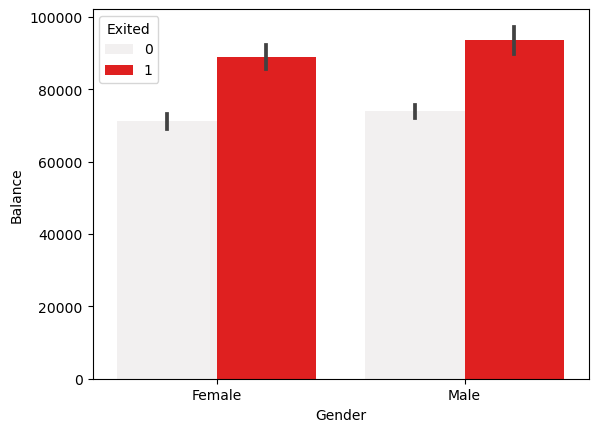

In [686]:
sns.barplot(data=data,x='Gender',y='Balance',color='red',hue='Exited')
plt.show()

- ### **_It seems that the gender coloumn is generally balanced with respect to the Balance of the cusotmers and the Exited feature_**

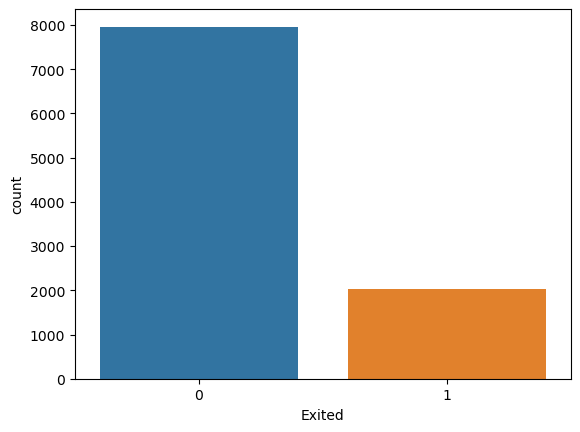

In [687]:
sns.countplot(x=data['Exited'])
plt.show()

- ### **_The Majority of the cusotmers remain subscribed and very few exited, thus oversampling is needed_**

# **_3) Feature Engineering_**

In [688]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Gender Encoded'] = encoder.fit_transform(data['Gender'])
data['Geography Encoded'] = encoder.fit_transform(data['Geography'])

In [690]:
data.drop(columns=['Gender','Geography'],inplace=True)

In [689]:
# data.drop(columns=['CreditScore', 'Tenure','HasCrCard','EstimatedSalary'],inplace=True)

- ### **_Tried Removing the Columns with low correlation with the target and it didn't result in the increasing of the model's performance, so they were added them back_**

In [691]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender Encoded,Geography Encoded
0,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,2
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,1


In [692]:
y = data['Exited']
x = data.drop('Exited',axis=1)

In [693]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender Encoded,Geography Encoded
0,619,42,2,0.00,1,1,1,101348.88,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,2
2,502,42,8,159660.80,3,1,0,113931.57,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,2
...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0
9996,516,35,10,57369.61,1,1,1,101699.77,1,0
9997,709,36,7,0.00,1,0,1,42085.58,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1


In [694]:
corr = data.corr()

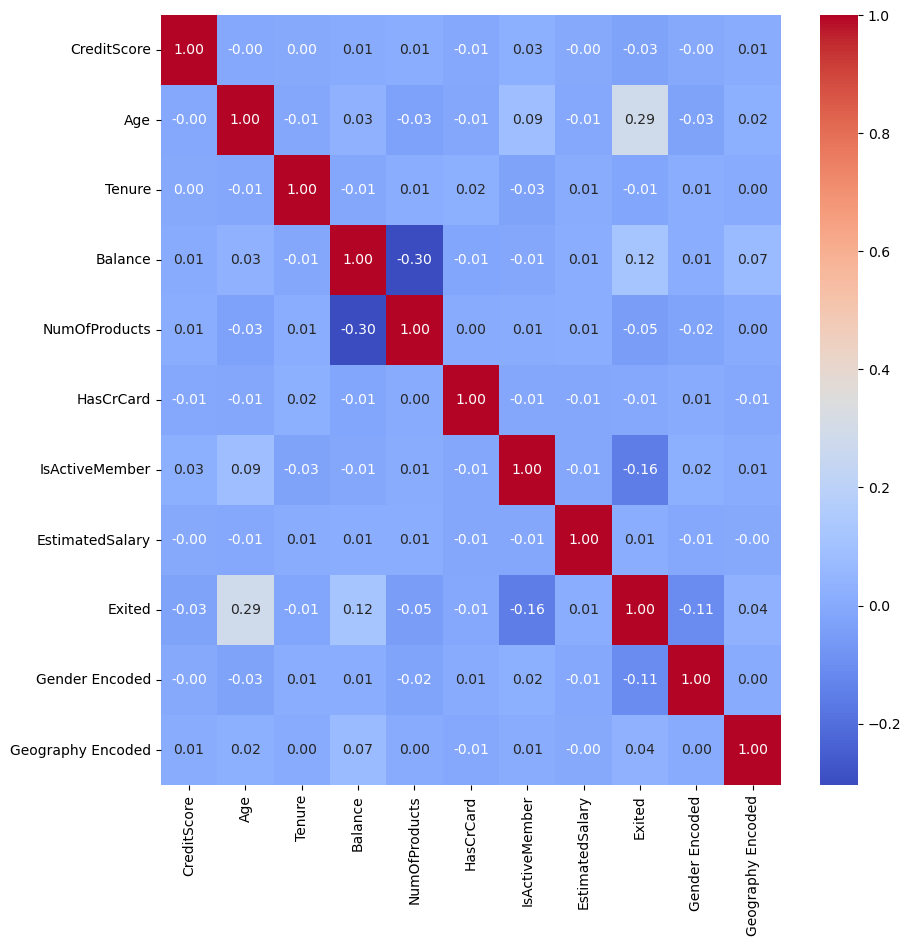

In [695]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,cmap='coolwarm',fmt='.2f',annot=True)
plt.show()

# **_4) OverSampling_**

In [696]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender Encoded,Geography Encoded
0,619,42,2,0.00,1,1,1,101348.88,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,2
2,502,42,8,159660.80,3,1,0,113931.57,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,2
...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0
9996,516,35,10,57369.61,1,1,1,101699.77,1,0
9997,709,36,7,0.00,1,0,1,42085.58,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1


In [697]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')

In [698]:
x_resampled, y_resampled = smote.fit_resample(x,y)

In [699]:
x_resampled

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender Encoded,Geography Encoded
0,619,42,2,0.000000,1,1,1,101348.880000,0,0
1,608,41,1,83807.860000,1,0,1,112542.580000,0,2
2,502,42,8,159660.800000,3,1,0,113931.570000,0,0
3,699,39,1,0.000000,2,0,0,93826.630000,0,0
4,850,43,2,125510.820000,1,1,1,79084.100000,0,2
...,...,...,...,...,...,...,...,...,...,...
15921,789,33,9,130225.514499,2,0,0,54051.421822,0,1
15922,607,59,7,141379.987386,1,1,0,194055.865890,0,1
15923,616,34,1,83460.837572,1,1,0,73059.337815,0,0
15924,738,38,6,150166.690349,1,0,0,151676.647433,0,1


# **_5) Splitting the Dataset_**

In [700]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_resampled,y_resampled,random_state=42,test_size=0.2)

In [701]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender Encoded,Geography Encoded
13555,587,49,5,128418.459155,1,0,0,79137.583374,1,1
1665,749,42,1,129776.720000,2,0,1,143538.510000,1,0
14878,611,39,5,0.000000,1,1,0,106703.219864,1,1
7471,658,55,8,119327.930000,1,0,1,119439.660000,0,1
2582,656,46,5,113402.140000,2,1,1,138849.060000,0,0
...,...,...,...,...,...,...,...,...,...,...
13418,580,41,0,100901.183684,1,0,0,7644.934076,1,1
5390,735,38,1,0.000000,3,0,0,92220.120000,0,0
860,667,43,8,190227.460000,1,1,0,97508.040000,1,0
15795,630,42,4,119662.665656,1,1,0,163017.499043,1,0


In [702]:
y_train

13555    1
1665     0
14878    1
7471     0
2582     0
        ..
13418    1
5390     1
860      1
15795    1
7270     0
Name: Exited, Length: 12740, dtype: int64

In [703]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [704]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [705]:
accuracy_list = {}

In [706]:
def apply_model(model,model_name):
    model.fit(x_train,y_train)
    train_predict = model.predict(x_train)
    test_predict = model.predict(x_test)
    print('Train Prediction')
    print(classification_report(y_train, train_predict))
    print(accuracy_score(y_train,train_predict))
    sns.heatmap(confusion_matrix(y_train,train_predict),cmap='coolwarm',fmt='d',annot=True)
    plt.show()
    print('=============================================================\n')
    print('Test Prediction')
    print(classification_report(y_test, test_predict))
    current_accuracy = accuracy_score(y_test,test_predict)
    print(current_accuracy)
    sns.heatmap(confusion_matrix(y_test,test_predict),cmap='coolwarm',fmt='d',annot=True)
    plt.show()
    accuracy_list[model_name] = current_accuracy

In [707]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

Train Prediction
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      6330
           1       0.86      0.89      0.87      6410

    accuracy                           0.87     12740
   macro avg       0.87      0.87      0.87     12740
weighted avg       0.87      0.87      0.87     12740

0.8713500784929357


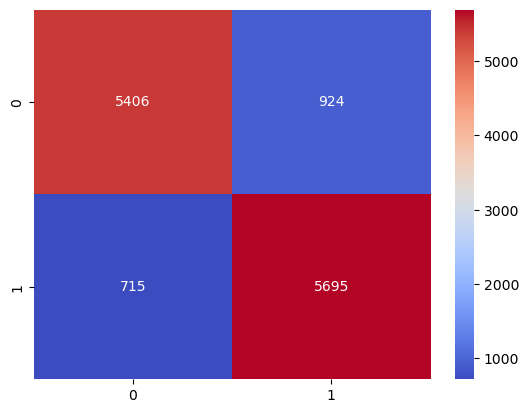


Test Prediction
              precision    recall  f1-score   support

           0       0.85      0.80      0.83      1633
           1       0.80      0.86      0.83      1553

    accuracy                           0.83      3186
   macro avg       0.83      0.83      0.83      3186
weighted avg       0.83      0.83      0.83      3186

0.8267419962335216


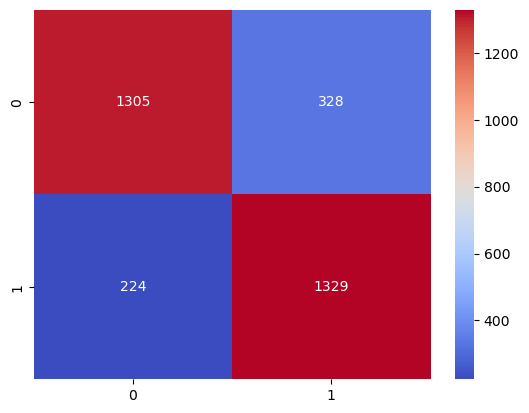

In [708]:
apply_model(knn_model,'KNN Model')

- ## **_The K Nearest Neighbours model had has an accuracy of 87% (the model learned the data decently), and the testing prediction is 82% which is slightly below acceptable_**

- ### **_The percision and recall scores for class 0 is highter than that of class 1. which implies that the model recognizes class 0 more during training and testing._**

In [709]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()

Train Prediction
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      6330
           1       0.80      0.79      0.79      6410

    accuracy                           0.79     12740
   macro avg       0.79      0.79      0.79     12740
weighted avg       0.79      0.79      0.79     12740

0.792778649921507


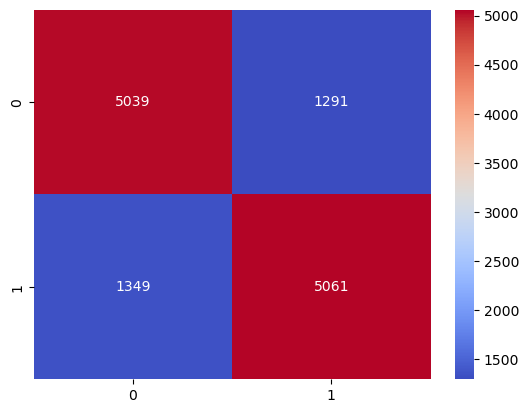


Test Prediction
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1633
           1       0.80      0.81      0.80      1553

    accuracy                           0.81      3186
   macro avg       0.81      0.81      0.81      3186
weighted avg       0.81      0.81      0.81      3186

0.8072818581293157


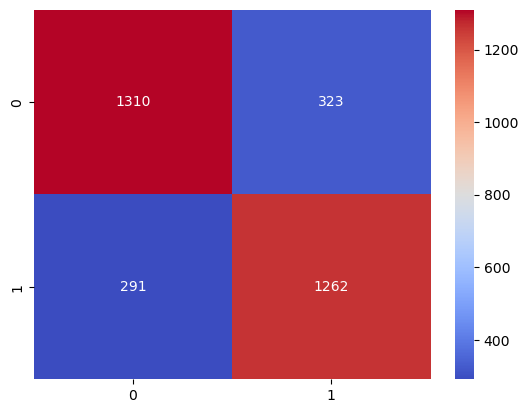

In [710]:
apply_model(nb_model, 'Naive Bayes')

- ### **_The Gaussian Naive Bayes's model performance is stable since the training and testing accuracy are close. But its scores are not good enough and the couldn't learn enough from the data so it slightly suffers from underfitting._**

Train Prediction
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      6330
           1       0.85      0.84      0.84      6410

    accuracy                           0.84     12740
   macro avg       0.84      0.84      0.84     12740
weighted avg       0.84      0.84      0.84     12740

0.8423076923076923


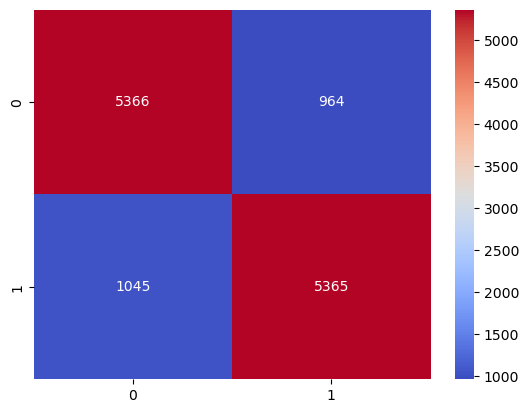


Test Prediction
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1633
           1       0.84      0.84      0.84      1553

    accuracy                           0.84      3186
   macro avg       0.84      0.84      0.84      3186
weighted avg       0.84      0.84      0.84      3186

0.8443188951663528


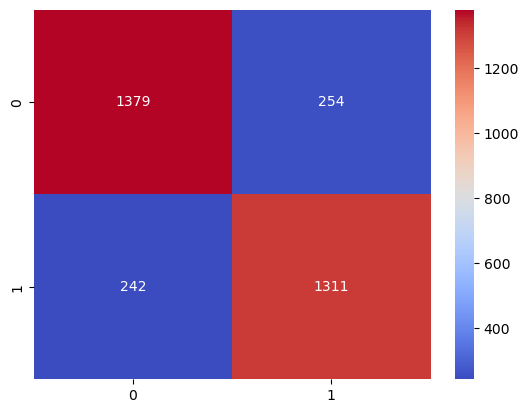

In [711]:
from sklearn.svm import SVC
svm_model = SVC(C=0.6,kernel='rbf')
apply_model(svm_model, 'SVM Model')

- ### **_The Support Vector Machine's model performance is stable since the training and testing accuracy are close. And its score is better than that of The Gaussian Naive Bayes model which makes this model more reliabble and better, although it is noticable that the SVC's speed is slower than any other model._**

Train Prediction
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      6330
           1       0.98      0.99      0.99      6410

    accuracy                           0.99     12740
   macro avg       0.99      0.99      0.99     12740
weighted avg       0.99      0.99      0.99     12740

0.9857927786499215


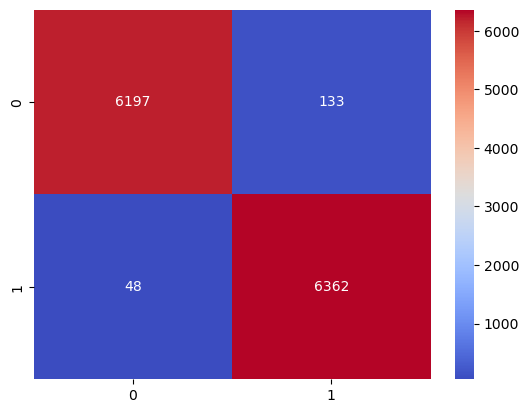


Test Prediction
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1633
           1       0.79      0.82      0.80      1553

    accuracy                           0.80      3186
   macro avg       0.80      0.80      0.80      3186
weighted avg       0.81      0.80      0.80      3186

0.8044569993722536


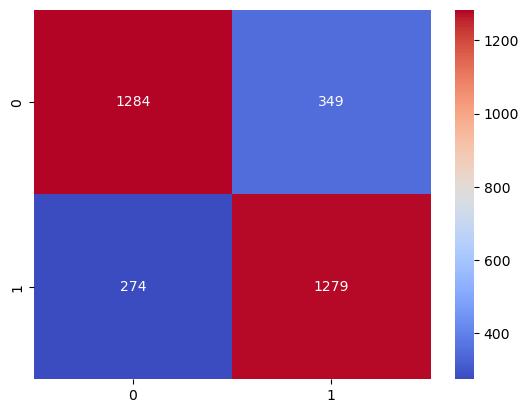

In [712]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=17)
apply_model(dt_model,'Decision Tree')

- ### **_It is noticable that the model immediately suffers from overfitting reaching 100% accuracy score during training, so hyperparameter tuning is a must in order to make this model reliable. The model's testing accuracy only reaches 80% which is not promising._**

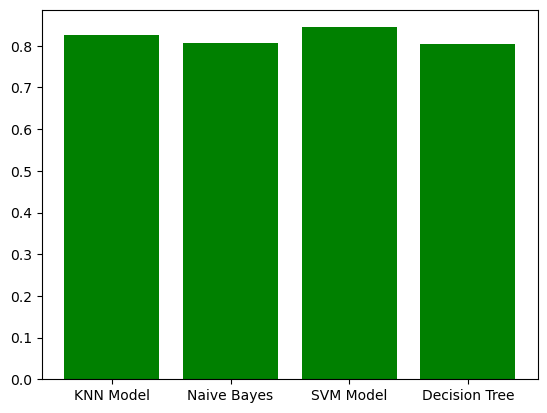

In [713]:
plt.bar(x=accuracy_list.keys(),height=accuracy_list.values(),color='green')
plt.show()

- ### **_Here we find that the SVM Model performs the best accuracy score out of the other models._** 

In [714]:
accuracy_list

{'KNN Model': 0.8267419962335216,
 'Naive Bayes': 0.8072818581293157,
 'SVM Model': 0.8443188951663528,
 'Decision Tree': 0.8044569993722536}

In [715]:
best_model = max(accuracy_list, key=accuracy_list.get)

In [716]:
best_model

'SVM Model'

In [717]:
max_accuracy = accuracy_list[best_model]
max_accuracy

0.8443188951663528

In [718]:
print(f"Model with Maximum Accuracy: {best_model}")
print(f"Maximum Accuracy Value: {max_accuracy:.4f}")

Model with Maximum Accuracy: SVM Model
Maximum Accuracy Value: 0.8443
